## **Daegu Apartment Price**
___

### **Business Problem Understanding**

**Context**

Daegu, as the third largest official metropolitan area in South Korea, also becomes one of destinations for locals and international tourists in South Korea. As a metropolitan city, housing is one common problem. As land price rises every year and limited choices, apartments becomes the alternatives for housing. Apartments may also becomes one option for tourists while visiting as an alternative to hotels, especially for longer terms.

As a Data Scientist recruited by a Property Rental Agent in Daegu, South Korea, we we're asked to predict the price of Apartments rents based on several conditions of the Apartment for the newly developed web-application service of the Rental Agent. Beforehand, the Rental Agent was manually estimating the rent price of properties based on locations and facilities only by their domain expertise, but not having a standard price estimation for estimating a property price, especially apartments. As a data scientist, we we're asked to find the rent price estimation standard for Apartments rents in Daegu, South Korea.

**Problem Statement**

The difficulties of rent price estimation of properties as usually caused by the misuderstandings of property owners to set property rent price. The tendency to obtain high profit caused several properties are being offered in relatively high price, but it would took longer time to rent. This might be a bad news for both rental agent and property owners, as property owners might need quick cash while property agents depends on the commissions which the commision's amount would depends on the property rent price. This means that **a competitive property price while still relatively affordable is important to make sure the property to be sold as soon as possible**.

**Goals**

Based on the problem above, the property agent require to have tools to be able to estimate optimal property price to produce a predicition of apartment rent price that are competitive, yet still be affordable to many people. This might increases the usage of the newly-developed application, both from the listed property and the property renter. As the usage of application increases, more commissions the property agent would receive.

**Analytic Approach**

First approach to conduct the prediction are understanding the data, by looking for patterns from the existing features, which would distinct each properties to the others. Next, we would build a regression model to be able to provide a tool for apartment rent price predicition based on the property features, facilities and distance of nearest subway.

**Metric Evaluation**

To evaluate the model, we're using RMSE, MAE and MAPE. RMSE is the root of mean squared error value, MAE is the absolute value of error mean, while MAPE is the mean percentage of error value. The lower the value of RMSE, MAE or MAPE, the better the model we made as the result would be more accurate to predict the price of rented apartment.

**Data Understanding**

- The dataset contains the apartment property data of Daegu, South Korea.
- Each row of data represent any information regarding the apartment and its facilities including inside and outside the apartment.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment Type |
| TimeToSubway | Object | Estimated time needed to nearest subway station |
| SubwayStation | Object | The name of nearest subway station |
| N_FacilitiesNearBy(ETC) | Float | Number of undescribed facilities |
| N_FacilitiesNearBy(PublicOffice) | Float | Number of nearest Public Office facilities |
| N_SchoolNearBy(University) | Float | Number of nearest universities |
| N_Parkinglot(Basement) | Float | Number of parking spaces available in the building's basement |
| N_FacilitiesInApt | Integer | Number of facilities available in apartment |
| YearBuilt | Integer | Year where the building was built |
| Size(sqf) | Integer | Size of apartment's room |
| SalePrice | Integer | Price of the apartment's room |

<br>

In [2]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [4]:
# For easier analysis, we will rename the column names to be shorter for easier column handling
df = df.rename(
    columns={'HallwayType': 'Type', 
             'N_FacilitiesNearBy(ETC)': 'n_etcfac', 
             'N_FacilitiesNearBy(PublicOffice)':'n_puboff', 
             'N_SchoolNearBy(University)':'n_uni', 
             'N_Parkinglot(Basement)':'n_basementlot', 
             'N_FacilitiesInApt':'n_aptfacl', 
             'Size(sqf)':'size', 
             'SalePrice':'price'}
            )

### **Exploratory Data Analysis (EDA)**
The exploratory data analysis (EDA) conducted to understand more about the data. It is one crucial step to investigate data anomalies and patterns by using summary statistics and graphical representations.

In [5]:
# Check for any missing value
df.isna().sum()

Type             0
TimeToSubway     0
SubwayStation    0
n_etcfac         0
n_puboff         0
n_uni            0
n_basementlot    0
YearBuilt        0
n_aptfacl        0
size             0
price            0
dtype: int64

In [6]:
# Checking the data types of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4123 non-null   object 
 1   TimeToSubway   4123 non-null   object 
 2   SubwayStation  4123 non-null   object 
 3   n_etcfac       4123 non-null   float64
 4   n_puboff       4123 non-null   float64
 5   n_uni          4123 non-null   float64
 6   n_basementlot  4123 non-null   float64
 7   YearBuilt      4123 non-null   int64  
 8   n_aptfacl      4123 non-null   int64  
 9   size           4123 non-null   int64  
 10  price          4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [7]:
# Checking if there is any duplicated data
df.duplicated().sum()

1422

In [8]:
# There are 1422 duplicated data, let's check
df[df.duplicated()]

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [9]:
# Describing the numerical features
df.describe()

,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [10]:
# Describing the categorical features
df.describe(include='object')

,Type,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


* We do not found any missing value inside the dataset, which we would consider the dataframe itself is clean.
* After checking the data types of each columns, all columns has already with correct data types based on their value.
* We found that there are 1,422 duplicated data that we will drop on data preprocessing.
* Based on the describe of both numerical and categorical data, there are no significant value to be considered as an anomaly

Next, we will move into data visualization.

### **Visualization**

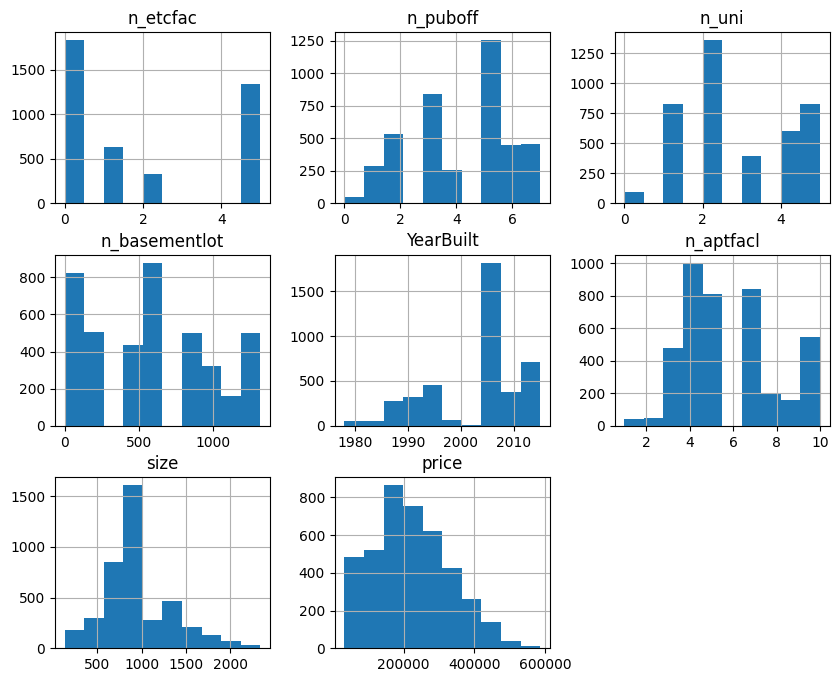

In [11]:
# Showing the distribution of each data columns
df.hist(figsize=(10,8))
plt.show()

Based on the histogram of each columns, we can conclude that all data are not normally distributed, and showing skewness (both negative and positive).

In [12]:
# Count number of apartments based on its types
df["Type"].value_counts()

terraced    2528
mixed       1131
corridor     464
Name: Type, dtype: int64


The total of terraced type are 2528,
the total of mixed type are 1131,
while the total of corridor type are 464.



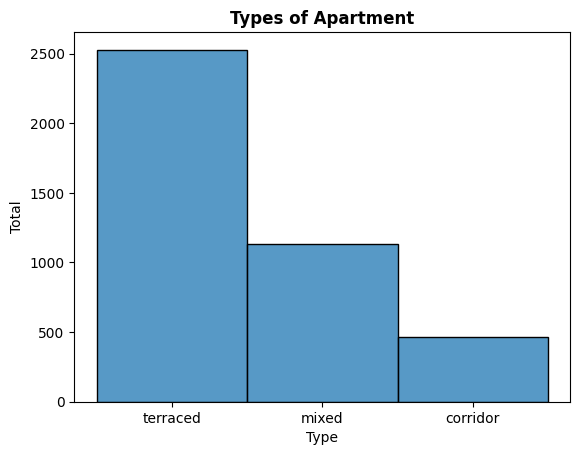

In [13]:
print(f'''
The total of {df["Type"].value_counts().index[0]} type are {df["Type"].value_counts()[0]},
the total of {df["Type"].value_counts().index[1]} type are {df["Type"].value_counts()[1]},
while the total of {df["Type"].value_counts().index[2]} type are {df["Type"].value_counts()[2]}.
''')

sns.histplot(df['Type'])
plt.title('Types of Apartment', weight='bold')
plt.ylabel('Total')

plt.show()

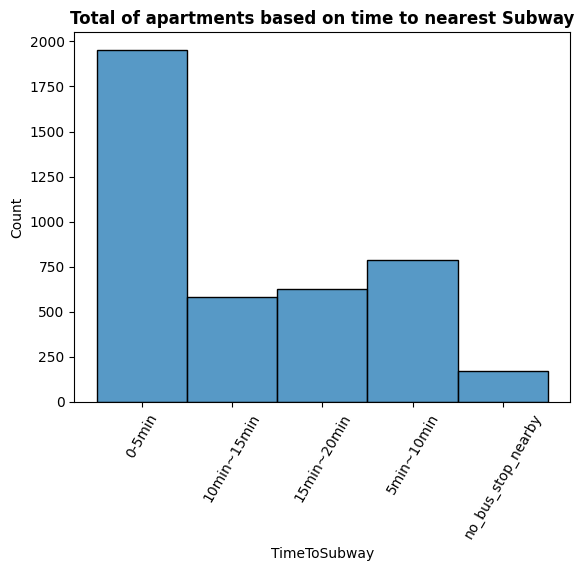

In [14]:
sns.histplot(df['TimeToSubway'])

plt.xticks(rotation=60)
plt.title('Total of apartments based on time to nearest Subway', weight='bold')
plt.show()

,Total
1978,49
1980,4
1985,51
1986,273
1992,326
1993,451
1997,67
2003,7
2005,502
2006,460


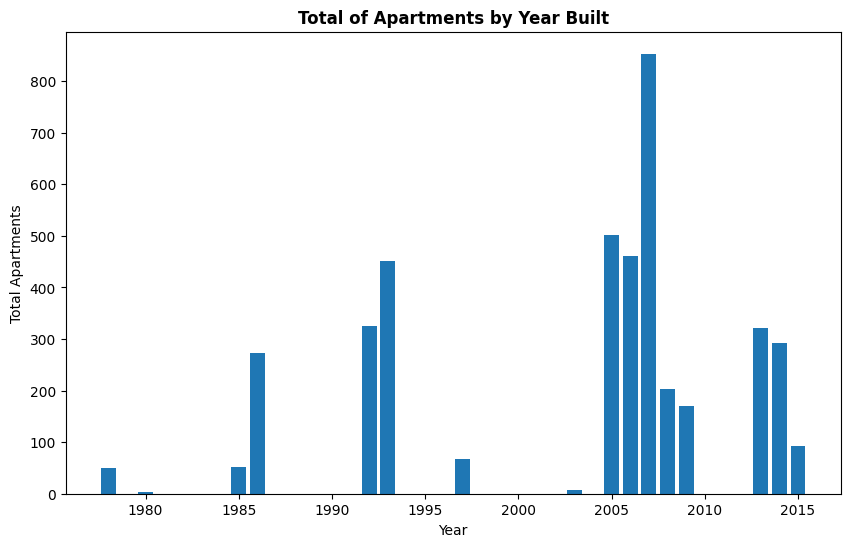

In [15]:
apart_year = df['YearBuilt'].value_counts().to_frame().rename({'YearBuilt':'Total'}, axis=1)
display(apart_year.sort_index())

plt.figure(figsize=(10,6))
plt.bar(apart_year.index, apart_year['Total'])

plt.xlabel('Year')
plt.ylabel('Total Apartments')
plt.title('Total of Apartments by Year Built', weight='bold')
plt.show()

,SubwayStation,price
0,Bangoge,167035.0
1,Banwoldang,315929.0
2,Chil-sung-market,88495.0
3,Daegu,86725.0
4,Kyungbuk_uni_hospital,238938.0
5,Myung-duk,154424.5
6,Sin-nam,247787.0
7,no_subway_nearby,207743.0


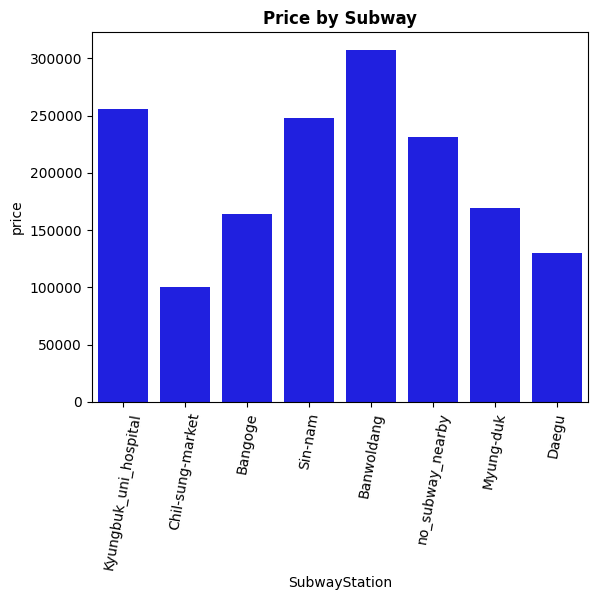

In [16]:
price_by_sub = df.groupby('SubwayStation').agg(np.median).reset_index()
display(price_by_sub[['SubwayStation','price']])

sns.barplot(x= df['SubwayStation'], y= df['price'], ci= None, color='Blue')
plt.xticks(rotation=80)

plt.title('Price by Subway', weight='bold')
plt.show()

* Based on the number of apartments based on its type, we could see that mostly apartments are terraced typed, and the least type of apartment are corridor typed.
* On the number of apartment based on time took to the nearest subway, most apartments are located near the station. This could also be caused by some apartment data within the same building are included in the dataset.
* By the time the apartment was built, most buildings are relatively new, within 2005 - 2010.
* While looking at the last barplot, Banwoldang Station is the station that mostly near to the apartments within the dataset.

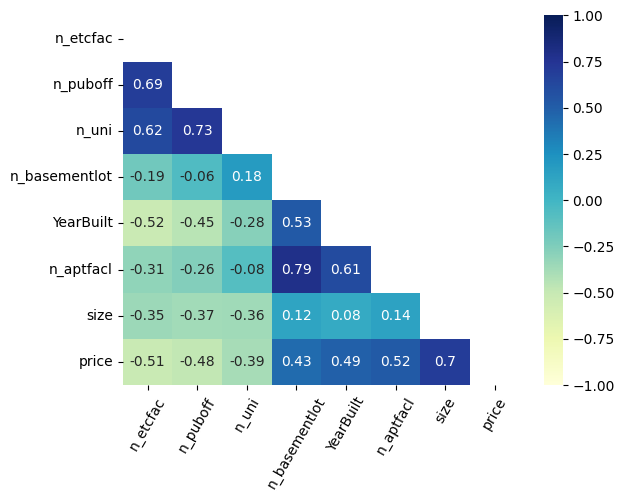

In [17]:
corr = df.corr(method='spearman')

sns.heatmap(corr.round(2), vmax= 1, vmin= -1, annot= True, mask= np.triu(np.ones_like(corr.corr())), cmap="YlGnBu")
plt.xticks(rotation= 60)
plt.show()

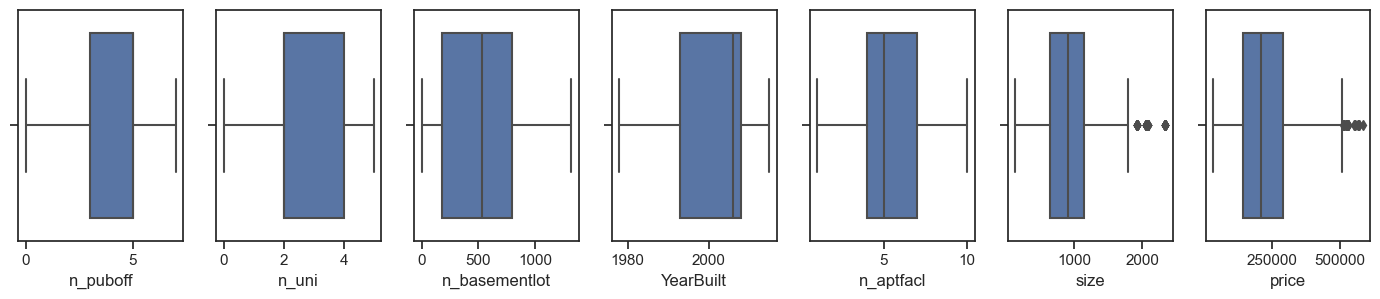

In [18]:
# Checking outliers in all numerical features
plt.figure(figsize=(20,3))
sns.set_theme(style="ticks")

df_col = df[['n_puboff','n_uni','n_basementlot','YearBuilt','n_aptfacl','size','price']]

plotnumber = 1
for kolom in df_col.describe():

    plt.subplot(1, 8, plotnumber)
    sns.boxplot(data=df, x=kolom)

    plotnumber += 1

plt.show()

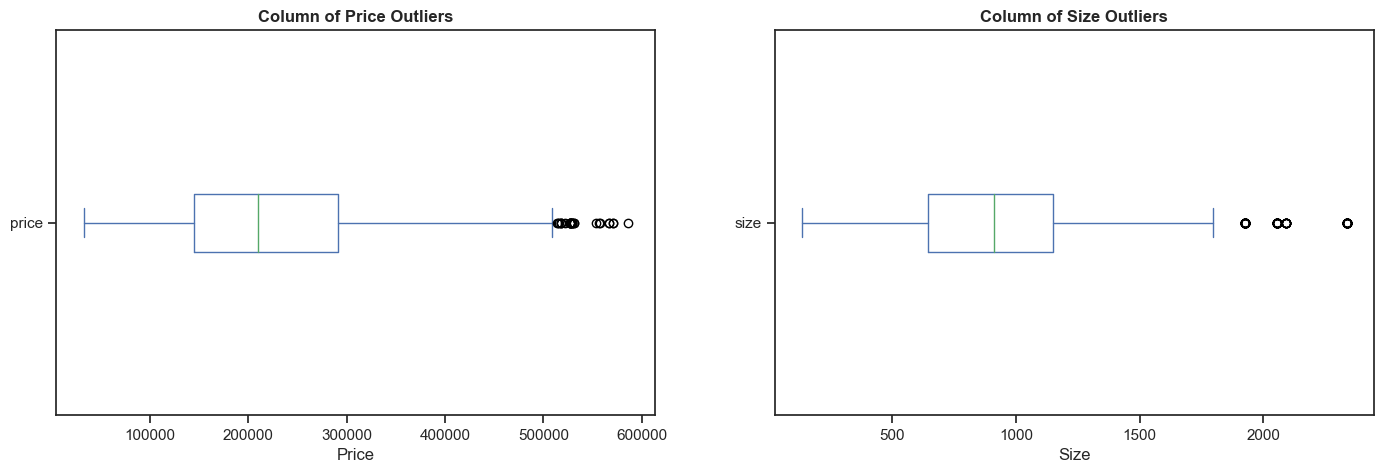

In [19]:
# As the column of `size` and `price` has outliers, we'll take a closer look
fig, axes = plt.subplots(1, 2, figsize=(17,5))

df['price'].plot(kind='box', vert=False, ax= axes[0])
df['size'].plot(kind='box', vert=False, ax= axes[1])

axes[0].set_xlabel('Price')
axes[0].set_title('Column of Price Outliers', weight='bold')

axes[1].set_xlabel('Size')
axes[1].set_title('Column of Size Outliers', weight='bold')
plt.show()

* Looking at the boxplots of all numerical features, there are two features that has outliers, which are `size` and `price`.
* Outliers on both features, `size` and `prize`, would not be included to analysis and we'll drop it on the step of data preprocessing.

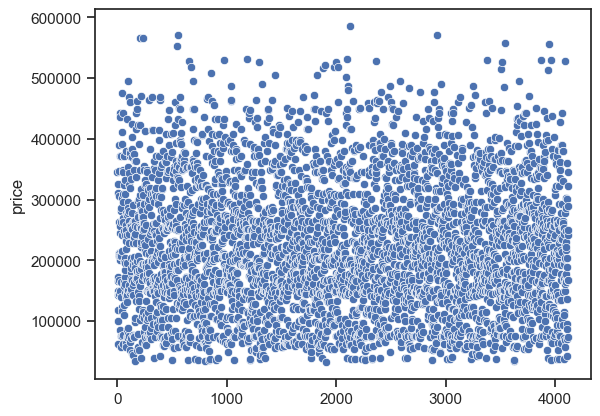

In [20]:
# Check if there's any pattern in apartment price
sns.scatterplot(df['price'])
plt.show()

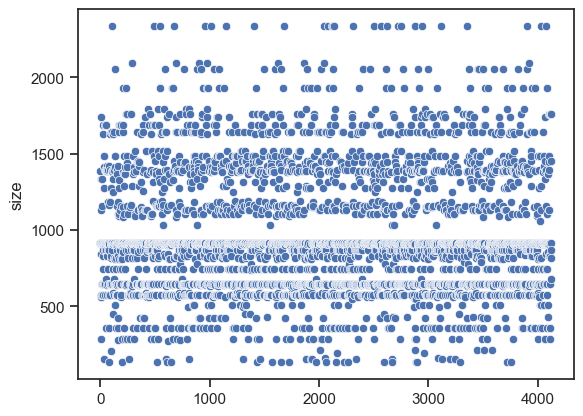

In [21]:
# Check of there's any pattern in apartment size
sns.scatterplot(df['size'])
plt.show()

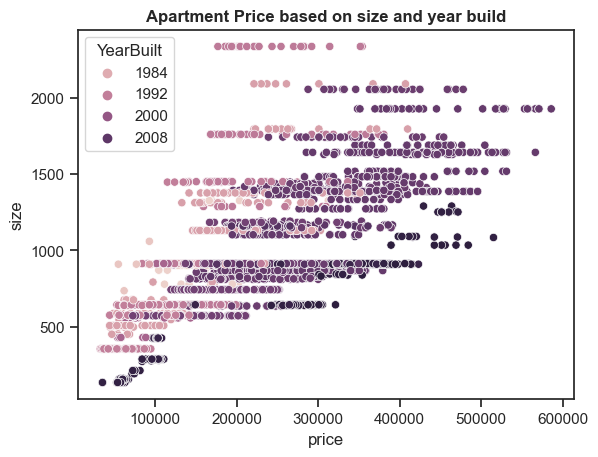

In [22]:
# Check if there's any pattern of apartment rent price based on the size and the year of the apartment was built

sns.scatterplot(x=df['price'], y=df['size'], hue=df['YearBuilt'])

plt.title('Apartment Price based on size and year build', weight='bold')
plt.show()

* Based on the scatterplots, there are no visible pattern on `price`, which it has high variance. 
* For the `size` feature, we able to see that rented apartment in Daegu, South Korea are mostly has size around 500 sqf - 1500 sqf.
* It is visible that, most apartments who are newly built (darker colour) usually has higher price compared to the old buildings (lighter colour).
* One interesting findings, that there are apartments that roughly estimated under 250 sqf and has cheap rent price, which might lead to Goshiwon, a small dormitory room that fits all user needs, one cheap option for living in South Korea.

### **Data Preprocessing**

In [23]:
# make a copy of the DataFrame
df_model = df.copy()

In [24]:
# Checking for unique values of each columns
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df_model.columns :
    listItem.append( [col, df_model[col].nunique(), df_model[col].unique()])

tabelunique = pd.DataFrame(columns=['Column Name', 'Total Unique', 'Unique Sample'],
                     data=listItem)
tabelunique

,Column Name,Total Unique,Unique Sample
0,Type,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,n_etcfac,4,"[0.0, 1.0, 5.0, 2.0]"
4,n_puboff,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,n_uni,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,n_basementlot,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,n_aptfacl,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,size,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


**Outliers and Data Limitation**

In [25]:
df_model.isna().sum()

Type             0
TimeToSubway     0
SubwayStation    0
n_etcfac         0
n_puboff         0
n_uni            0
n_basementlot    0
YearBuilt        0
n_aptfacl        0
size             0
price            0
dtype: int64

Here, we could see that some features has outliers, which are `size` and `price` features. `price` has more outliers compared to `size` feature.

In [26]:
# describing numerical features
df_model.describe()

,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [27]:
# describing objects
df_model.describe(include = 'object')

,Type,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [28]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4123 non-null   object 
 1   TimeToSubway   4123 non-null   object 
 2   SubwayStation  4123 non-null   object 
 3   n_etcfac       4123 non-null   float64
 4   n_puboff       4123 non-null   float64
 5   n_uni          4123 non-null   float64
 6   n_basementlot  4123 non-null   float64
 7   YearBuilt      4123 non-null   int64  
 8   n_aptfacl      4123 non-null   int64  
 9   size           4123 non-null   int64  
 10  price          4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


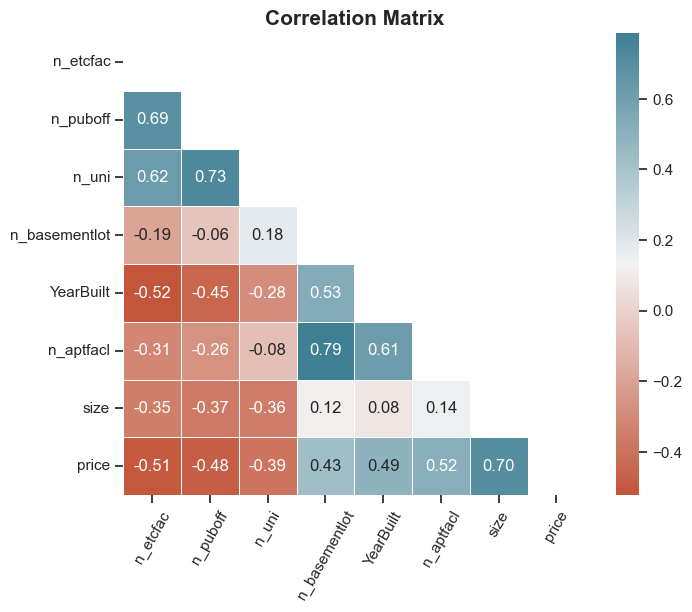

In [29]:
# Correlation matrix

plt.figure(figsize=(8, 6))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='spearman')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5, mask= np.triu(np.ones_like(corr.corr())))
plt.xticks(rotation=60)
plt.title('Correlation Matrix', size=15, weight='bold');

plt.show()

Based on the Correlation Matrix above, we could see `price` and `size` are positively correlated. Which we may conclude that the larger the space of apartments, the higher its price. Other than that, other independent variables are not showing strong correlation with the response variable.

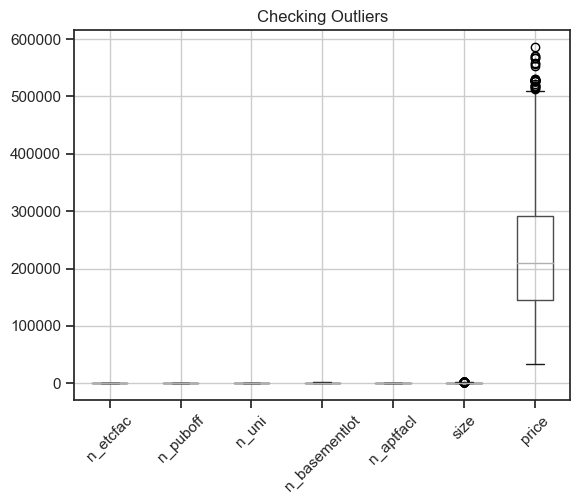

In [30]:
# Checking for outliers
df_model.drop(columns=['YearBuilt']).boxplot(rot=45)

plt.title('Checking Outliers')
plt.show()

Here, we could see that some features has outliers, which are `size` and `price` features. `price` has more outliers compared to `size` feature. To have a better analysis, we would not include outliers into our analysis on the next steps. To start, we would find out outliers for each numerical features.

In [31]:
# functions for outliers
columns = df_model[['n_etcfac','n_puboff','n_uni','n_basementlot','n_aptfacl','size','price']]

iqrx = []
bottom = []
upper = []

for i in columns:
    q1 = columns.quantile(0.25)
    q3 = columns.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    # print(f'IQR: {iqr}')
    iqrx.append(iqr[i])

    bottom_limit = q1 - limit
    upper_limit = q3 + limit
    # print(f'Bottom Limit: {bottom_limit}')
    # print(f'Upper Limit: {upper_limit}')
    bottom.append(bottom_limit[i])
    upper.append(upper_limit[i])

iqr_bottom_upper = pd.DataFrame({
    'Columns' : ['n_etcfac','n_puboff','n_uni','n_basementlot','n_aptfacl','size','price'],
    'IQR' : iqrx,
    'Bottom Limit' : bottom,
    'Upper Limit' : upper
    })

iqr_bottom_upper

,Columns,IQR,Bottom Limit,Upper Limit
0,n_etcfac,5.0,-7.5,12.5
1,n_puboff,2.0,0.0,8.0
2,n_uni,2.0,-1.0,7.0
3,n_basementlot,614.0,-737.0,1719.0
4,n_aptfacl,3.0,-0.5,11.5
5,size,505.0,-113.5,1906.5
6,price,146398.0,-74845.0,510747.0


In [32]:
# Checking how much outliers from size column
df_model['size'].where(df_model['size'] > 1906.5).count()

98

In [33]:
# Checking how much outliers from n_etcfac column
df_model['price'].where(df_model['price'] > 510747.0).count()

27

Next step, we will start doing the feature engineering for each numerical features especially for numerical features with outliers.

**Price**

In [34]:
# Price column descriptive statistics
df_model['price'].describe()

count      4123.000000
mean     221767.926995
std      106739.839945
min       32743.000000
25%      144752.000000
50%      209734.000000
75%      291150.000000
max      585840.000000
Name: price, dtype: float64

In [35]:
# Total of outliers in Price feature
df_model['price'].where(df_model['price'] > 510747.0).count()

27

Based on the descriptive statistics, 75% of the data are below KRW 291,150, while the maximum price is KRW 585,840. We can indicate a positive skewness and based on the calculation above, we could see there are 27 outliers in `price` column.

In [36]:
# Top 10 most expensive apartment rent
df_model[df_model['price'] > 510747].head(10).sort_values('price', ascending= False)

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
550,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,570796
204,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,566371
234,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,566371
549,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,553097
1180,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,530973
971,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,529203
656,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,528318
1295,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1519,526548
669,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,517699
1877,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,515929


From the table above, we might indicates a premium apartment whithin the same building and having a high rent price, while at the same time are newly built and varieties of room size.

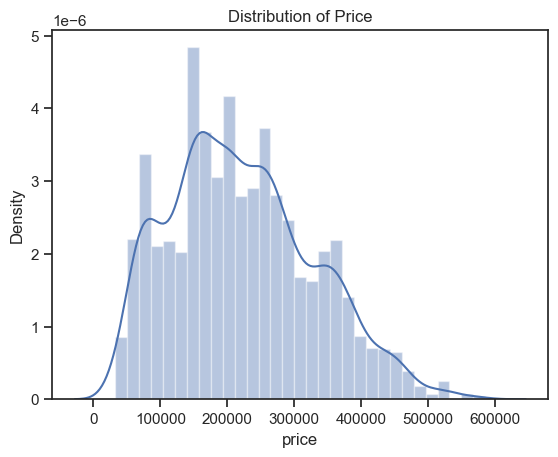

In [37]:
# Distribution of `price` feature before removing the outliers
sns.distplot(df['price'])

plt.title('Distribution of Price')
plt.show()

In [38]:
# We will use only apartment rent price under the upper limit which is KRW 510,747.
df_model = df_model[(df_model['price'] <= 510747)]
df_model

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


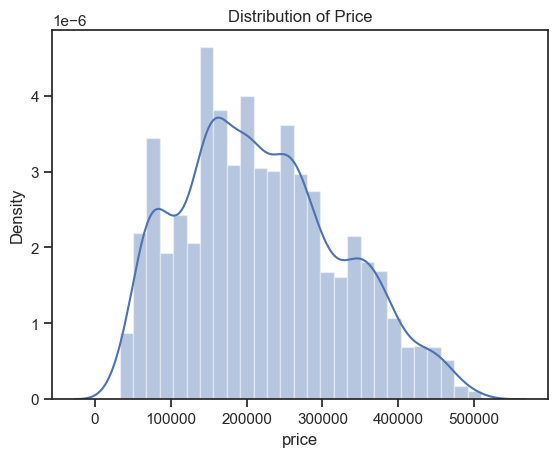

In [39]:
# Distribution of `price` feature after removing the outliers
sns.distplot(df_model['price'])

plt.title('Distribution of Price')
plt.show()

**Size**

In [40]:
# Size column descriptive statistics
df_model['size'].describe()

count    4096.000000
mean      949.107178
std       378.608713
min       135.000000
25%       644.000000
50%       910.000000
75%      1131.000000
max      2337.000000
Name: size, dtype: float64

In [41]:
# Total of outliers in Price feature
df_model['size'].where(df_model['size'] > 1906.5).count()

81

In [42]:
# Showing 10 outliers of price column
df_model[df_model['size'] > 1906.5].head(10).sort_values('size',ascending=False)

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
106,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,243362
493,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,190265
546,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
672,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,2337,194690
288,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,300884
690,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,2092,261061
134,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,424778
593,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,371681
767,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,2056,330088
207,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1928,348283


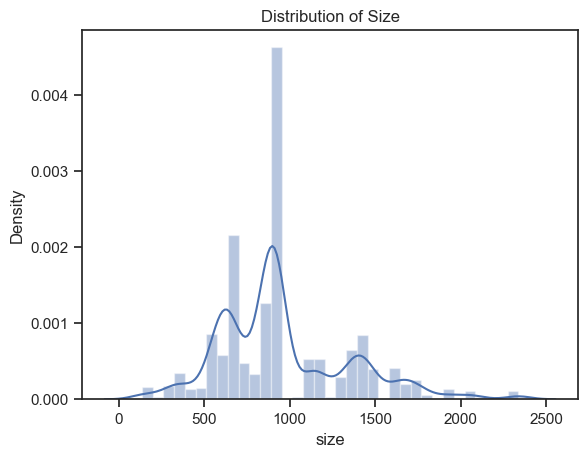

In [43]:
# Distribution of `size` feature before removing the outliers
sns.distplot(df['size'])

plt.title('Distribution of Size')
plt.show()

In [44]:
# We will use only rented apartment size under the upper limit which is 1,906.5 sqm.
df_model = df_model[(df_model['size'] <= 1906.5)]
df_model

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


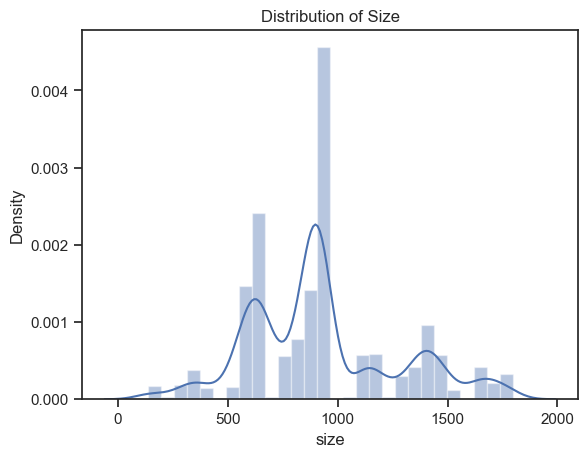

In [45]:
# Distribution of `size` feature after removing the outliers
sns.distplot(df_model['size'])

plt.title('Distribution of Size')
plt.show()

**Removing Duplicate**

In [46]:
df_model.duplicated().sum()

1408

There are 1,408 duplicated data, which we have to remove. Duplicated data may inflate the importance of certain features and may lead to overfitting. We want to make sure that the model is trained on a representative sample of the data.

In [47]:
df_model = df_model.drop_duplicates()

In [48]:
df_model.duplicated().sum()

0

In [49]:
# checking the clean datasheet
df_model

,Type,TimeToSubway,SubwayStation,n_etcfac,n_puboff,n_uni,n_basementlot,YearBuilt,n_aptfacl,size,price
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4116,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
4117,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


In [50]:
# checking each columns data type
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           2607 non-null   object 
 1   TimeToSubway   2607 non-null   object 
 2   SubwayStation  2607 non-null   object 
 3   n_etcfac       2607 non-null   float64
 4   n_puboff       2607 non-null   float64
 5   n_uni          2607 non-null   float64
 6   n_basementlot  2607 non-null   float64
 7   YearBuilt      2607 non-null   int64  
 8   n_aptfacl      2607 non-null   int64  
 9   size           2607 non-null   int64  
 10  price          2607 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 244.4+ KB


In the end, we will use 2607 rows of data out of 4123 rows which we just drop more than 50% of data.

## **Modelling**

In [51]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### **Encoding**

Converting categorical features into numerical features.

In [52]:
# Categories of TimeToSubway column
df_model['TimeToSubway'].value_counts()

0-5min                1186
5min~10min             501
10min~15min            426
15min~20min            394
no_bus_stop_nearby     100
Name: TimeToSubway, dtype: int64

In [53]:
# Categories of SubwayStation column
df_model['SubwayStation'].value_counts()

Myung-duk                684
Kyungbuk_uni_hospital    646
Sin-nam                  357
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: SubwayStation, dtype: int64

In [54]:
# Converting categorical features into numerical features

ordinal_mapping = [
    {'col':'TimeToSubway', 'mapping':{'0-5min':0, '5min~10min':1, '10min~15min':2, '15min~20min':3, 'no_bus_stop_nearby':4}}
]

ordinal = ce.OrdinalEncoder(mapping=ordinal_mapping)

transformer = ColumnTransformer(transformers=[
    ('One Hot', OneHotEncoder(), ['Type','SubwayStation']),
    ('Ordinal', ordinal, ['TimeToSubway'])
], remainder= 'passthrough')

One of the reason why we're encode `TimeToSubway` to ordinal mapping, because we can sort the time order. We want to sort it from the shortest time to the longest time, which in this case, there are no bus stop near the apartment (which beyond 20 minutes). Other than that, `Type` and `SubwayStation` would be one-hot encoded.

### **Data Splitting**

In [55]:
# Data Splitting
x = df_model.drop(['price'], axis= 1)
y = df_model['price']

In [56]:
# Data splitting
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,  
    test_size= 0.3, 
    random_state= 12
)

### **Benchmarking**

In [57]:
# Define algorithm for benchmarking

linear = LinearRegression()
tree = DecisionTreeRegressor(random_state= 12)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state= 12)
xgb = XGBRegressor(random_state= 12)
gradient = GradientBoostingRegressor(random_state= 12)
ada = AdaBoostRegressor(random_state= 12)
bagging = BaggingRegressor(random_state= 12)

# Standard Scaler
scaler = StandardScaler()

# Algorithm
models = [linear, tree, knn, rf, xgb, gradient, ada, bagging]

score_rmse = []
score_mean_rmse = []
score_std_rmse = []

score_mae = []
score_mean_mae = []
score_std_mae = []

score_mape = []
score_mean_mape = []
score_std_mape = []

for i in models:
    crossval = KFold(n_splits= 5, shuffle= True, random_state= 12)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv= crossval,
        scoring= 'neg_root_mean_squared_error',
        error_score= 'raise'
    )
    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    score_mean_rmse.append(model_cv_rmse.mean())
    score_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv= crossval,
        scoring= 'neg_mean_absolute_error',
        error_score= 'raise'
    )
    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    score_mean_mae.append(model_cv_mae.mean())
    score_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        x_train,
        y_train,
        cv= crossval,
        scoring= 'neg_mean_absolute_percentage_error',
        error_score= 'raise'
    )
    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    score_mean_mape.append(model_cv_mape.mean())
    score_std_mape.append(model_cv_mape.std())

[-50810.40113764 -49945.64330943 -48586.13056883 -47864.19629963
 -53330.08638278] LinearRegression()
[-41748.93311884 -40668.92684534 -40685.00025497 -39559.5331803
 -43793.87266302] LinearRegression()
[-0.22754562 -0.213916   -0.21991425 -0.20593738 -0.22712131] LinearRegression()
[-46573.95655758 -46007.20491642 -44049.30124056 -43741.02274942
 -49781.23966115] DecisionTreeRegressor(random_state=12)
[-37965.81326615 -37204.19524636 -35869.10029079 -35924.05114122
 -39169.75478005] DecisionTreeRegressor(random_state=12)
[-0.19898318 -0.1896246  -0.19890663 -0.18669675 -0.19259709] DecisionTreeRegressor(random_state=12)
[-48212.47090715 -50945.47786066 -45125.03397373 -45594.85699076
 -52061.30874799] KNeighborsRegressor()
[-38771.40767123 -40685.77917808 -36330.89479452 -36744.74356164
 -40817.88846154] KNeighborsRegressor()
[-0.2033862  -0.21414162 -0.19745305 -0.18896713 -0.20610648] KNeighborsRegressor()
[-46615.76238519 -46299.49663551 -43697.28868523 -43639.63899528
 -49765.0978

In [58]:
# Evaluate all seven used algorithm based on its RMSE, MAE and MAPE result

pd.DataFrame({
    'Model':['Linear Regression','Decision Tree Regressor','KNN Regressor','Random Forest Regressor','XGB Regressor','GradientBoost Regressor','AdaBoost Regressor','Bagging Regressor'],
    'Mean RMSE': score_mean_rmse,
    'Std RMSE': score_std_rmse,
    'Mean MAE': score_mean_mae,
    'Std MAE': score_std_mae,
    'Mean MAPE': score_mean_mape,
    'Std MAPE': score_std_mape
})

,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
0,Linear Regression,-50107.291540,1910.618058,-41291.253212,1430.123214,-0.218887,0.008200
1,Decision Tree Regressor,-46030.545025,2169.368124,-37226.582945,1253.971907,-0.193362,0.004926
2,KNN Regressor,-48387.829696,2775.366485,-38670.142733,1890.243342,-0.202011,0.008447
3,Random Forest Regressor,-46003.456901,2259.139072,-37229.157924,1351.680257,-0.194274,0.004965
4,XGB Regressor,-46035.679870,2184.312736,-37227.126220,1254.110692,-0.193789,0.004617
5,GradientBoost Regressor,-45694.463495,2160.700690,-37156.295364,1371.697261,-0.193710,0.003875
6,AdaBoost Regressor,-49377.446830,2563.535143,-41674.559798,2235.605677,-0.230551,0.012141
7,Bagging Regressor,-45980.696113,2302.188880,-37314.282656,1411.785080,-0.194641,0.004223


Error is the predicted value minus the real value. The less the error, the better the model and more accuracy we achieve. Most common used for evaluate error are **Root Mean Square Error (RMSE)**, **Mean Absolute Error (MAE**) and **Mean Absolute Percentage Error (MAPE)**. **RMSE** is the square root of the average squared error which scaled to the original error and sensitive to the outliers , **MAE** is the mean of the absolute error which based on the median of error and not sensitive to outliers, while MAPE is similar to MAE, but normalized by true observation.

* Based on RMSE score, **GradientBoost** is the best model, and it has small score gap compared to **Bagging** and **Random Forest**. While for the score based on MAE and MAPE, **GradientBoost** also has the best score based on MAE and **Decision Tree** is the best model based on MAPE. We will compare **GradientBoost**, **Bagging**, **Random Forest** and **Decision Tree** by predicting the test set.

**Predict to test set with the benchmark model**

In [59]:
# Benchmark with four best models

models = {
    'GradientBoost' : GradientBoostingRegressor(random_state= 12),
    'Bagging' : BaggingRegressor(random_state = 12),
    'Random Forest' : RandomForestRegressor(random_state= 12),
    'Decision Tree': DecisionTreeRegressor(random_state= 12)
}

score_rmse = []
score_mae = []
score_mape = []

# Predict to test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
GradientBoost,43800.314023,35730.394543,0.194832
Bagging,44637.399033,35925.229952,0.193894
Random Forest,44489.701534,35909.529836,0.193997
Decision Tree,44423.580813,35845.071388,0.193914


We may conclude that by overall, **GradientBoost** has better score compared to the other models. Hence, we will use **GradientBoost** for our prediction model.

**Hyperparameter Tuning**

In [60]:
# Tree depth
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Number of tree
n_estimators = list(np.arange(50, 201))

# Number of rows for each tree (% of total train set rows)
subsample = list(np.arange(2, 10)/10)

# Hyperparam space GradienBoost
hyperparam_space_gb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample
}

In [61]:
pd.DataFrame({
    'Best Parameters' : ['max_depth','learning_rate','n_estimators','subsample'],
    'Value' : ['3','0.18','113','0.6']
})

# {'model__subsample': 0.6, 'model__n_estimators': 113, 'model__max_depth': 3, 'model__learning_rate': 0.18}

,Best Parameters,Value
0,max_depth,3
1,learning_rate,0.18
2,n_estimators,113
3,subsample,0.6


In [62]:
# Benchmark the model with hyperparameter tuning
gb = GradientBoostingRegressor(random_state= 12, verbose= 0)

# Make algorithm chains
estimator_gb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', gb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state= 12)

# Hyperparameter tuning
random_gb = RandomizedSearchCV(
    estimator_gb, 
    param_distributions= hyperparam_space_gb,
    n_iter = 250,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error',
    random_state= 12 
)

In [63]:
# Fit to train data to find best parameters
random_gb.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['Type',
                                                                                'SubwayStation']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': 0-5min                0
5min~10min            1
10min~15min           2
15min~20...
                                        'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=12, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [64]:
# Looking the tuned score in dataframe, sorted by RMSE, MAE and MAPE
pd.DataFrame(random_gb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
239,0.262111,0.007019,0.012580,0.000959,0.6,114,2,0.19,"{'model__subsample': 0.6, 'model__n_estimators': 114, 'model__max_depth': 2, 'model__learning_rate': 0.19}",-45857.999991,...,1222.344604,5,-0.197787,-0.189967,-0.199644,-0.187513,-0.197361,-0.194454,0.004792,70
56,0.458731,0.070365,0.013708,0.001035,0.7,159,3,0.05,"{'model__subsample': 0.7, 'model__n_estimators': 159, 'model__max_depth': 3, 'model__learning_rate': 0.05}",-46063.735358,...,1590.649374,25,-0.199110,-0.190352,-0.195008,-0.187964,-0.200696,-0.194626,0.004894,79
238,0.284511,0.007061,0.011671,0.000685,0.6,113,3,0.18,"{'model__subsample': 0.6, 'model__n_estimators': 113, 'model__max_depth': 3, 'model__learning_rate': 0.18}",-46362.976867,...,1418.529356,1,-0.197546,-0.189849,-0.194849,-0.184328,-0.196093,-0.192533,0.004852,1
18,0.434454,0.016104,0.014600,0.001880,0.9,188,2,0.1,"{'model__subsample': 0.9, 'model__n_estimators': 188, 'model__max_depth': 2, 'model__learning_rate': 0.1}",-46220.658090,...,1284.613280,20,-0.199836,-0.190510,-0.196210,-0.189652,-0.195841,-0.194410,0.003810,68
188,0.376012,0.014606,0.012735,0.000856,0.3,178,3,0.06,"{'model__subsample': 0.3, 'model__n_estimators': 178, 'model__max_depth': 3, 'model__learning_rate': 0.06}",-46141.372626,...,1398.541624,60,-0.201906,-0.190927,-0.194790,-0.189937,-0.197007,-0.194913,0.004335,92


In [65]:
# Check for the best score and parameters
print('GradientBoost')
print('Best_score:', random_gb.best_score_)
print('Best_params:', random_gb.best_params_)

GradientBoost
Best_score: -37015.21457172787
Best_params: {'model__subsample': 0.6, 'model__n_estimators': 113, 'model__max_depth': 3, 'model__learning_rate': 0.18}


By the result above, we able to achieve best parameters for our modelling, which are:
* subsample     : 0.6
* n_estimators  : 113
* max_depth     : 3
* learning_rate : 0.18

Next, we will use the best parameters for prediction and compare the score obtained before and after the hyperparameter tuning.

**Predict to Test Set with the Tuned Model**

Making predictions to test set by using **GradientBoost** and best parameters.

In [66]:
# Using GradientBoost model
model = {'GradientBoost' : GradientBoostingRegressor(random_state= 12)}

# Define model with the best estimator
gb_tuning = random_gb.best_estimator_

# Model Fitting
gb_tuning.fit(x_train, y_train)

# Predict Test Set
y_pred_gb_tuning = gb_tuning.predict(x_test)

rmse_gb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_gb_tuning))
mae_gb_tuning = mean_absolute_error(y_test, y_pred_gb_tuning)
mape_gb_tuning = mean_absolute_percentage_error(y_test, y_pred_gb_tuning)

tuned_score = pd.DataFrame({'RMSE': rmse_gb_tuning, 'MAE': mae_gb_tuning, 'MAPE': mape_gb_tuning}, index= model.keys())
tuned_score

,RMSE,MAE,MAPE
GradientBoost,43901.294658,35616.43017,0.194247


In [67]:
# Let's compare the score before and after its tuned

print('Before Hyperparameter Tuning')
display(pd.DataFrame(score_before_tuning.loc['GradientBoost']).T)
print('After Hyperparameter Tuning')
display(tuned_score)

Before Hyperparameter Tuning


,RMSE,MAE,MAPE
GradientBoost,43800.314023,35730.394543,0.194832


After Hyperparameter Tuning


,RMSE,MAE,MAPE
GradientBoost,43901.294658,35616.43017,0.194247


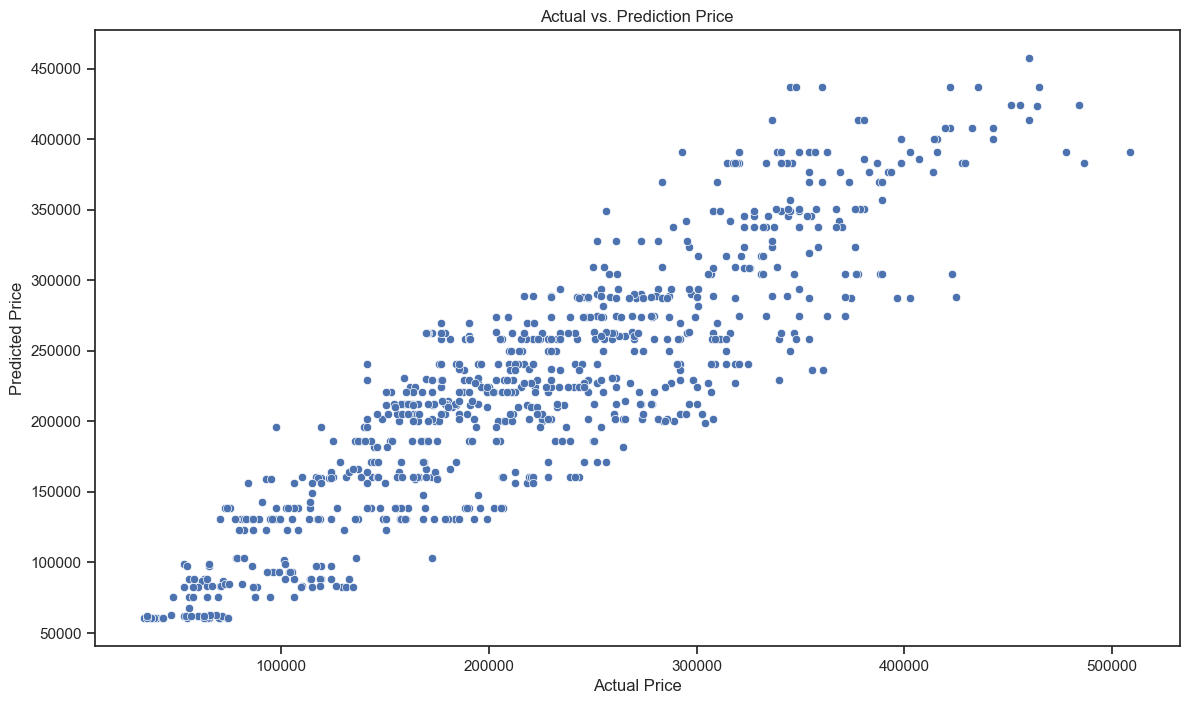

In [68]:
# Visualizing the Actual vs Prediction Price
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x= y_test, y= y_pred_gb_tuning).set(title= 'Actual vs. Prediction Price', 
                                               xlabel= 'Actual Price', 
                                               ylabel= 'Predicted Price')

## **Feature Importance**

In [69]:
gb_tuning['model'].feature_importances_

array([6.07784591e-03, 1.20236759e-03, 3.76288467e-01, 1.07885685e-03,
       8.30260597e-04, 4.38472304e-04, 0.00000000e+00, 3.11499129e-03,
       1.46988648e-04, 1.29019171e-03, 1.09312756e-03, 2.21621519e-02,
       1.36751712e-02, 1.16558173e-02, 4.55497317e-03, 5.17882987e-02,
       9.41878060e-02, 4.35010202e-02, 3.66913192e-01])

In [95]:
# gb_tuning['preprocessing'].get_feature_names_out['transformers']

TypeError: 'method' object is not subscriptable

In [81]:
feat_imp_cols = ['One Hot__x0_corridor','One Hot__x0_mixed','One Hot__x0_terraced','One Hot__x1_Bangoge','One Hot__x1_Banwoldang','One Hot__x1_Chil-sung-market','One Hot__x1_Daegu','One Hot__x1_Kyungbuk_uni_hospital','One Hot__x1_Myung-duk','One Hot__x1_Sin-nam','One Hot__x1_no_subway_nearby','Ordinal__TimeToSubway','n_etcfac','n_puboff','n_uni','n_basementlot','YearBuilt','n_aptfacl','size']

Due to technical issue, where I am not able to extract the feature labels to identify the feature importance by using *get_feature_names_out*, I asked permission to manually input the name of the columns, whereas the *get_feature_names_out* works perfectly on my lecture device. The error that I got was "BaseEncoder.get_feature_names_out() takes 1 positional argument but 2 were given" and "'method' object is not subscriptable".

<AxesSubplot: title={'center': 'Feature Importance'}>

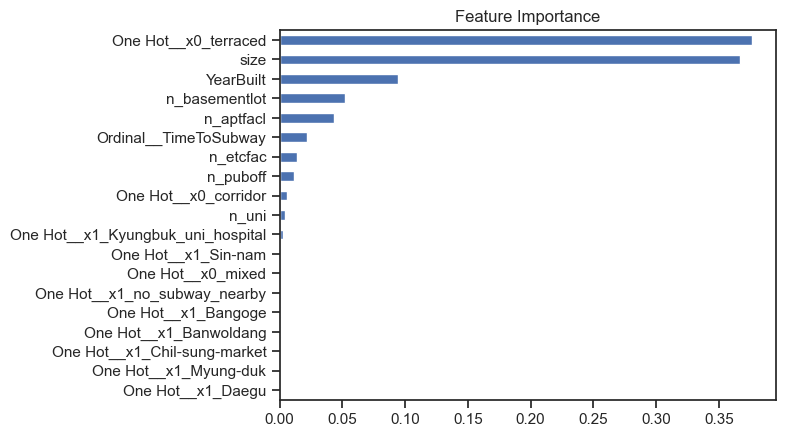

In [88]:
feat_imp = pd.Series(gb_tuning['model'].feature_importances_, feat_imp_cols).sort_values()

feat_imp.plot(kind= 'barh', title= 'Feature Importance')

## **Conclusion**

Based on the regression model that we had used, there are 2 features that are significantly influence `price`, which are `One Hot__x0_terraced` and `size`.

Evaluation metrics that were used are RMSE, MAE and MAPE, which if we saw the MAPE score after the hyperparameter tuning, which were 19.4%, we may conclude that once this machine learning model used to predict new listed apartment rent price in Daegu, South Korea within the price scale that trained in the model, which is KRW 510,747, then the predicted apartment price would mishit 19.4% out of its real price in average.

On the other hand, there are possibilities that the prediction missed significantly higher due to the bias that are produced by the model still considerably high if we see the visualization of predicted and actual price. The bias may due to the limited features that represents the property unit, such as number of bedrooms, does pet allowed into the apartment, floor or even type of heater.

## **Recommendation**

There are recommendations to be able enhance the model accuracy, which are:

* Adding more features that correlate more to the `price` response variable, such as number of bedrooms, pet allowance, floor or type of heater. Also, adding more unique data and less duplicated data would improve the model with lower error and may lead to less bias.

* After adding more features and more data, next analysis may use other algorithm that are more complex to be able to lower the error even more.

---

**Save Model**

In [ ]:
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', GradientBoostingRegressor())])
# estimator.fit(x_train, y_train)

# pickle.dump(estimator, open('Model_Dhimas_Daegu_Gradient.sav', 'wb'))

In [ ]:
# Load Model

# filename = 'Model_Dhimas_Daegu_Gradient.sav'
# load_model = pickle.load(open(filename, 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, load_model.predict(x_test)))